In [1]:
import iris, windspharm
import warnings
import numpy as np
import iris.plot as iplt

import iris.quickplot as qplt

import matplotlib.pyplot as plt
import cartopy.crs as ccrs  
import mo_pack
from matplotlib import ticker, cm
import iris.analysis.cartography
import aeolus
from aeolus.coord import volume_weights_cube, area_weights_cube, coord_delta_to_cube

In [2]:
warnings.filterwarnings("ignore")


# Import the climate and chemistry data

In [3]:
pcb_b = iris.load('../data_b/pcb_bnox_musc_7440_120_2.nc')

In [4]:
tsurf = pcb_b.extract_cube('surface_temperature')
avttsurf = tsurf.collapsed('t', iris.analysis.MEAN)
tair = pcb_b.extract_cube('air_temperature')
avttair = tair.collapsed('t', iris.analysis.MEAN)
pair = pcb_b.extract_cube('air_pressure')
avtpair = pair.collapsed('t', iris.analysis.MEAN)
uwind = pcb_b.extract_cube('eastward_wind')
avtuwind = uwind.collapsed('t', iris.analysis.MEAN)
vwind = pcb_b.extract_cube('northward_wind')
avtvwind = vwind.collapsed('t', iris.analysis.MEAN)
zwind = pcb_b.extract_cube('upward_air_velocity')
avtzwind = zwind.collapsed('t', iris.analysis.MEAN)
o3column = pcb_b.extract_cube('Stash code = 50219')
avto3column = o3column.collapsed('t', iris.analysis.MEAN)
# nommr = pcb_b.extract_cube('NO MASS MIXING RATIO')
# avtnommr = nommr.collapsed('t', iris.analysis.MEAN)
# no2mmr= pcb_b.extract_cube('Stash code = 34996')
# avtno2mmr= no2mmr.collapsed('t', iris.analysis.MEAN)
theta= pcb_b.extract_cube('air_potential_temperature')
humid=pcb_b.extract_cube('specific_humidity')
avthumid = humid.collapsed('t', iris.analysis.MEAN)
uvflux=pcb_b.extract_cube('NET UV FLUX')
avtuvflux = uvflux.collapsed('t', iris.analysis.MEAN)

down_sw_air=pcb_b.extract_cube('surface_downwelling_shortwave_flux_in_air')
avtdown_sw_air = down_sw_air.collapsed('t', iris.analysis.MEAN)
down_sw_air_clear=pcb_b.extract_cube('surface_downwelling_shortwave_flux_in_air_assuming_clear_sky')
avtdown_sw_air_clear = down_sw_air_clear.collapsed('t', iris.analysis.MEAN)

rf50101 = pcb_b.extract_cube('Stash code = 50101')
avt50101 = rf50101.collapsed('t', iris.analysis.MEAN)
rf50011 = pcb_b.extract_cube('Stash code = 50011')
avtrf50011 = rf50011.collapsed('t', iris.analysis.MEAN)
rf50012 = pcb_b.extract_cube('Stash code = 50012')
avtrf50012 = rf50012.collapsed('t', iris.analysis.MEAN)
rf50013 = pcb_b.extract_cube('Stash code = 50013')
avtrf50013 = rf50013.collapsed('t', iris.analysis.MEAN)
rf50014 = pcb_b.extract_cube('Stash code = 50014')
avtrf50014 = rf50014.collapsed('t', iris.analysis.MEAN)
rf50016 = pcb_b.extract_cube('Stash code = 50016')
avtrf50016 = rf50016.collapsed('t', iris.analysis.MEAN)
rf50502 = pcb_b.extract_cube('Stash code = 50502')
avtrf50502 = rf50502.collapsed('t', iris.analysis.MEAN)
rf50504 = pcb_b.extract_cube('Stash code = 50504')
avtrf50504 = rf50504.collapsed('t', iris.analysis.MEAN)
rf50120 = pcb_b.extract_cube('Stash code = 50120')
avtrf50120 = rf50120.collapsed('t', iris.analysis.MEAN)
rf50119 = pcb_b.extract_cube('Stash code = 50119')
avtrf50119 = rf50119.collapsed('t', iris.analysis.MEAN)

j50245 = pcb_b.extract_cube('Stash code = 50245')
avtj50245 = j50245.collapsed('t', iris.analysis.MEAN)

o3mmr = pcb_b.extract_cube('O3 MASS MIXING RATIO')
avto3mmr = o3mmr.collapsed('t', iris.analysis.MEAN)*29.3/48
ohmmr = pcb_b.extract_cube('OH MASS MIXING RATIO')
avtohmmr = ohmmr.collapsed('t', iris.analysis.MEAN)*29.3/17.008
ho2mmr = pcb_b.extract_cube('HO2 MASS MIXING RATIO')
avtho2mmr = ho2mmr.collapsed('t', iris.analysis.MEAN)*29.3/33.008
o3pmmr = pcb_b.extract_cube('O3P MASS MIXING RATIO')
avto3pmmr = o3pmmr.collapsed('t', iris.analysis.MEAN)*29.3/15.999
o1dmmr = pcb_b.extract_cube('Stash code = 34997')
avto1dmmr = o1dmmr.collapsed('t', iris.analysis.MEAN)*29.3/15.999
h2o2mmr = pcb_b.extract_cube('H2O2 MASS MIXING RATIO')
avth2o2mmr = h2o2mmr.collapsed('t', iris.analysis.MEAN)*29.3/34.0147
hmmr = pcb_b.extract_cube('H MASS MIXING RATIO')
avthmmr = hmmr.collapsed('t', iris.analysis.MEAN)*29.3/1.008

#NOx/NOy
nommr = pcb_b.extract_cube('NO MASS MIXING RATIO')
avtnommr = nommr.collapsed('t', iris.analysis.MEAN)*29.3/30.01
no2mmr= pcb_b.extract_cube('Stash code = 34996')
avtno2mmr= no2mmr.collapsed('t', iris.analysis.MEAN)*29.3/46.0055
no3mmr = pcb_b.extract_cube('NO3 MASS MIXING RATIO')
avtno3mmr= no3mmr.collapsed('t', iris.analysis.MEAN)*29.3/62.0049
hono2mmr = pcb_b.extract_cube('HONO2 MASS MIXING RATIO')
avthono2mmr= hono2mmr.collapsed('t', iris.analysis.MEAN)*29.3/63.0128
nmmr = pcb_b.extract_cube('N MASS MIXING RATIO')
avtnmmr= nmmr.collapsed('t', iris.analysis.MEAN)*29.3/14.0067
n2o5mmr = pcb_b.extract_cube('N2O5 MASS MIXING RATIO')
avtn2o5mmr= n2o5mmr.collapsed('t', iris.analysis.MEAN)*29.3/108.01
ho2no2mmr = pcb_b.extract_cube('HO2NO2 MASS MIXING RATIO')
avtho2no2mmr= ho2no2mmr.collapsed('t', iris.analysis.MEAN)*29.3/79.0122
n2ommr = pcb_b.extract_cube('N2O MASS MIXING RATIO')
avtn2ommr = n2ommr.collapsed('t', iris.analysis.MEAN)*29.3/44.013
honommr = pcb_b.extract_cube('HONO MASS MIXING RATIO')
avthonommr = honommr.collapsed('t', iris.analysis.MEAN)*29.3/47.01344

lfr = pcb_b.extract_cube('Stash code = 21115')
avtlfr = lfr.collapsed('t', iris.analysis.MEAN)
# #lfrnumb = aqea200.extract_cube('Stash code = 21104')
# #avtlfrnumb = lfrnumb.collapsed('t', iris.analysis.MEAN)
linox3d = pcb_b.extract_cube('Stash code = 50081')
avtlinox3d = linox3d.collapsed('t', iris.analysis.MEAN)
li_n = pcb_b.extract_cube('Stash code = 50085')
avtli_n = li_n.collapsed('t', iris.analysis.MEAN)

#O2+O+M
rf50501 = pcb_b.extract_cube('Stash code = 50501')
avtrf50501 = rf50501.collapsed('t', iris.analysis.MEAN)

#second HOx cycle
#OH+O->H+O2
rf50503 = pcb_b.extract_cube('Stash code = 50503')
avtrf50503 = rf50503.collapsed('t', iris.analysis.MEAN)
#HO2+O->OH+O2
rf50118 = pcb_b.extract_cube('Stash code = 50118')
avtrf50118 = rf50118.collapsed('t', iris.analysis.MEAN)
#H+O2+M->HO2
rf50511 = pcb_b.extract_cube('Stash code = 50511')
avtrf50511 = rf50511.collapsed('t', iris.analysis.MEAN)
#NOx catalytic cycles
rf50117 = pcb_b.extract_cube('Stash code = 50117')
avtrf50117 = rf50117.collapsed('t', iris.analysis.MEAN)
rf50121 = pcb_b.extract_cube('Stash code = 50121')
avtrf50121 = rf50121.collapsed('t', iris.analysis.MEAN)
rf50046 = pcb_b.extract_cube('Stash code = 50046')
avtrf50046 = rf50046.collapsed('t', iris.analysis.MEAN)
#New NOx cycle reacitons:
rf50522 = pcb_b.extract_cube('Stash code = 50522')
avtrf50522 = rf50522.collapsed('t', iris.analysis.MEAN)
rf50523 = pcb_b.extract_cube('Stash code = 50523')
avtrf50523 = rf50523.collapsed('t', iris.analysis.MEAN)
rf50524 = pcb_b.extract_cube('Stash code = 50524')
avtrf50524 = rf50524.collapsed('t', iris.analysis.MEAN)
#Ox production from NOy
#rf50104 = pcb_b.extract_cube('Stash code = 50104')
#avtrf50104 = rf50104.collapsed('t', iris.analysis.MEAN)
rf50001 = pcb_b.extract_cube('Stash code = 50001')
avtrf50001 = rf50001.collapsed('t', iris.analysis.MEAN)


#Other Ox loss reactions
rf50017 = pcb_b.extract_cube('Stash code = 50017')
avtrf50017 = rf50017.collapsed('t', iris.analysis.MEAN)
#rf50123 = pcb_b.extract_cube('Stash code = 50123')
#avtrf50123 = rf50123.collapsed('t', iris.analysis.MEAN)
#rf50124 = pcb_b.extract_cube('Stash code = 50124')
#avtrf50124 = rf50124.collapsed('t', iris.analysis.MEAN)

#Deposition
rf50131 = pcb_b.extract_cube('Stash code = 50131')
ddep_o3 = rf50131.collapsed('t', iris.analysis.MEAN)
rf50132 = pcb_b.extract_cube('Stash code = 50132')
ddep_noy = rf50132.collapsed('t', iris.analysis.MEAN)
rf50133 = pcb_b.extract_cube('Stash code = 50133')
wdep_noy = rf50133.collapsed('t', iris.analysis.MEAN)

#Other NO3 destructive fluxes
rf50525 = pcb_b.extract_cube('Stash code = 50525')
avtrf50525 = rf50525.collapsed('t', iris.analysis.MEAN)
rf50526 = pcb_b.extract_cube('Stash code = 50526')
avtrf50526 = rf50526.collapsed('t', iris.analysis.MEAN)

#H2+O
rf50512 = pcb_b.extract_cube('Stash code = 50512')
avtrf50512 = rf50512.collapsed('t', iris.analysis.MEAN)
#HO2+H
rf50513 = pcb_b.extract_cube('Stash code = 50513')
avtrf50513 = rf50513.collapsed('t', iris.analysis.MEAN)
#H2O phot
rf50514 = pcb_b.extract_cube('Stash code = 50514')
avtrf50514 = rf50514.collapsed('t', iris.analysis.MEAN)
#H2O2 phot
rf50515 = pcb_b.extract_cube('Stash code = 50515')
avtrf50515 = rf50515.collapsed('t', iris.analysis.MEAN)



#NO3+hv->NO+O2
rf50121 = pcb_b.extract_cube('Stash code = 50121')
avtrf50121 = rf50121.collapsed('t', iris.analysis.MEAN)
#NO3+hv->NO2+O3P
rf50533 = pcb_b.extract_cube('Stash code = 50533')
avtrf50533 = rf50533.collapsed('t', iris.analysis.MEAN)
#NO phot
rf50531 = pcb_b.extract_cube('Stash code = 50531')
avtrf50531 = rf50531.collapsed('t', iris.analysis.MEAN)
#NO2 phot
rf50532 = pcb_b.extract_cube('Stash code = 50532')
avtrf50532 = rf50532.collapsed('t', iris.analysis.MEAN)
#HNO3 phot
rf50534 = pcb_b.extract_cube('Stash code = 50534')
avtrf50534 = rf50534.collapsed('t', iris.analysis.MEAN)
#HONO phot
rf50535 = pcb_b.extract_cube('Stash code = 50535')
avtrf50535 = rf50535.collapsed('t', iris.analysis.MEAN)
#HO2NO2 phot
rf50536 = pcb_b.extract_cube('Stash code = 50536')
avtrf50536 = rf50536.collapsed('t', iris.analysis.MEAN)
#N2O5 phot
rf50537 = pcb_b.extract_cube('Stash code = 50537')
avtrf50537 = rf50537.collapsed('t', iris.analysis.MEAN)
#N2O phot
rf50538 = pcb_b.extract_cube('Stash code = 50538')
avtrf50538 = rf50538.collapsed('t', iris.analysis.MEAN)

#NO3+O3P
rf50541 = pcb_b.extract_cube('Stash code = 50541')
avtrf50541 = rf50541.collapsed('t', iris.analysis.MEAN)

#NO2+OH+M
rf50542 = pcb_b.extract_cube('Stash code = 50542')
avtrf50542 = rf50542.collapsed('t', iris.analysis.MEAN)

#NO3+HO2
rf50543 = pcb_b.extract_cube('Stash code = 50543')
avtrf50543 = rf50543.collapsed('t', iris.analysis.MEAN)

#NO3+OH
rf50544 = pcb_b.extract_cube('Stash code = 50544')
avtrf50544 = rf50544.collapsed('t', iris.analysis.MEAN)

#N2O5+M
rf50545 = pcb_b.extract_cube('Stash code = 50545')
avtrf50545 = rf50545.collapsed('t', iris.analysis.MEAN)


#Deposition
rf50581 = pcb_b.extract_cube('Stash code = 50581')
ddep_no3 = rf50581.collapsed('t', iris.analysis.MEAN)
rf50582 = pcb_b.extract_cube('Stash code = 50582')
ddep_n2o5 = rf50582.collapsed('t', iris.analysis.MEAN)
rf50583 = pcb_b.extract_cube('Stash code = 50583')
ddep_hno3 = rf50583.collapsed('t', iris.analysis.MEAN)

rf50585 = pcb_b.extract_cube('Stash code = 50585')
wdep_no3 = rf50585.collapsed('t', iris.analysis.MEAN)
rf50586 = pcb_b.extract_cube('Stash code = 50586')
wdep_n2o5 = rf50586.collapsed('t', iris.analysis.MEAN)
rf50587 = pcb_b.extract_cube('Stash code = 50587')
wdep_hno3 = rf50587.collapsed('t', iris.analysis.MEAN)



# Some standard cube operations

In [5]:
from iris.util import broadcast_to_shape, guess_coord_axis, is_regular
from iris.analysis.cartography import wrap_lons

def zonal_mean(cube, lon_name="longitude"):
    """
    Calculate cube's zonal average.
    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with a latitude coordinate.
    lon_name: str, optional
        Name of the longitude coordinate.
    Returns
    -------
    iris.cube.Cube
        Collapsed cube.
    """
    cube_mean = cube.collapsed(lon_name, iris.analysis.MEAN)
    return cube_mean


def meridional_mean(cube, lat_name="latitude"):
    """
    Calculate cube's meridional average.
    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with a latitude coordinate.
    lat_name: str, optional
        Name of the latitude coordinate.
    Returns
    -------
    iris.cube.Cube
        Collapsed cube.
    """
    coslat = np.cos(np.deg2rad(cube.coord(lat_name).points))
    coslat2d = iris.util.broadcast_to_shape(
        coslat, cube.shape, cube.coord_dims(lat_name)
    )
    cube_mean = (cube * coslat2d).collapsed(lat_name, iris.analysis.SUM) / np.sum(
        coslat
    )
    return cube_mean

def cube_min(cube):
    a=cube.collapsed('latitude', iris.analysis.MIN)
    b=a.collapsed('longitude', iris.analysis.MIN)
    return b.data

def cube_max(cube):
    a=cube.collapsed('latitude', iris.analysis.MAX)
    b=a.collapsed('longitude', iris.analysis.MAX)
    return b.data

def deltacube(cube1,cube2):
    cube3 = (cube1-cube2)
    return cube3


 
def volume_weights_cube2(cube, r_planet=None, normalize=False, model=aeolus.model.um):
    """
    Create a cube of volume weights from a grid of a given cube.

    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with longitude, latitude and height coordinates
    r_planet: float, optional
        Radius of the planet (m). If not given, an attempt is made
        to get it from the cube metadata.
    normalize: bool, optional
        Normalize the data.
    model: aeolus.model.Model, optional
        Model class with relevant coordinate names.

    Returns
    -------
    iris.cube.Cube
        Cube of area weights with the same metadata as the input cube
    """
    area_cube = area_weights_cube(cube, r_planet=r_planet, normalize=normalize, model=model)
    height_deltas = coord_delta_to_cube(cube, model.z, normalize=normalize)
    volume = area_cube * height_deltas
    if normalize:
        volume.rename("normalized_volume_weights")
        volume.convert_units("1")
    else:
        volume.rename("volume_weights")
        volume.units == "m**3"
    return volume

def _is_longitude_global(lon_points):
    """Return True if array of longitudes covers the whole sphere."""
    dx = np.diff(lon_points)[0]  # assume regular grid
    case_0_360 = ((lon_points[0] - dx) <= 0) and ((lon_points[-1] + dx) >= 360)
    case_pm180 = ((lon_points[0] - dx) <= -180) and ((lon_points[-1] + dx) >= 180)
    return case_0_360 or case_pm180

def roll_cube_pm180(cube_in):
    """
    Take a cube spanning 0...360 degrees in longitude and roll it to -180...180 degrees.

    Works with global model output, and in some cases for regional.

    Parameters
    ----------
    cube: iris.cube.Cube
        Cube with longitude and latitude coordinates.
    model: aeolus.model.Model, optional
        Model class with a relevant longitude coordinate name.

    Returns
    -------
    iris.cube.Cube

    See also
    --------
    aeolus.coord.roll_cube_0_360
    """
    cube = cube_in.copy()
    #coord_name = model.x  # get the name of the longitude coordinate
    xcoord = cube.coord('longitude')
    if (xcoord.points >= 0.0).all():
        assert is_regular(xcoord), "Operation is only valid for a regularly spaced coordinate."
        if _is_longitude_global(xcoord.points):
            # Shift data symmetrically only when dealing with global cubes
            cube.data = np.roll(cube.data, len(xcoord.points) // 2, axis=-1)

        if xcoord.has_bounds():
            bounds = wrap_lons(xcoord.bounds, -180, 360)  # + subtract
            bounds = bounds[bounds[:, 0].argsort(axis=0)]
        else:
            bounds = None
        cube.replace_coord(
            xcoord.copy(points=np.sort(wrap_lons(xcoord.points, -180, 360)), bounds=bounds)
        )
    else:
        # Nothing to do, the cube is already centered on 0 longitude
        # unless there is something wrong with longitude
        msg = f"Incorrect {coord_name} values: from {xcoord.points.min()} to {xcoord.points.max()}"
        assert ((xcoord.points >= -180.0) & (xcoord.points <= 180.0)).all(), msg
    return cube

def cuberoll_merid(cube_in):
    roll = roll_cube_pm180(cube_in)
    #roll_merid=meridional_mean(roll)
    return roll

In [6]:
volume = volume_weights_cube2(avt50101)
area = area_weights_cube(avt50101, r_planet=None, normalize=False, model=aeolus.model.um)

# Separating day and nightside and calculating averages

In [7]:

def hemisphere_sep(cube):
    daycube=cube.extract(iris.Constraint(longitude=lambda v: v > 270 or v <= 90,
                                    latitude=lambda v: -90 <= v <= 90))
    nightcube=cube.extract(iris.Constraint(longitude=lambda v: 90 < v <= 270,
                                    latitude=lambda v: -90 <= v <= 90)) 
    daymean = meridional_mean(zonal_mean(daycube))
    nightmean = meridional_mean(zonal_mean(nightcube)) 
    return daymean, nightmean

rf1_mday, rf1_mnight = hemisphere_sep(avt50101/volume)
rf2_mday, rf2_mnight = hemisphere_sep(avtrf50501/volume) #O+O2+M
rf3_4_mday, rf3_4_mnight = hemisphere_sep(avtrf50502/volume)
rf5_mday, rf5_mnight = hemisphere_sep(avtrf50120/volume)
#HOX1
rf10_mday, rf10_mnight = hemisphere_sep(avtrf50011/volume)
rf11_mday, rf11_mnight = hemisphere_sep(avtrf50014/volume)
rf12_mday, rf12_mnight = hemisphere_sep(avtrf50013/volume)
rf17_mday, rf17_mnight = hemisphere_sep(avtrf50118/volume)
rf13_mday, rf13_mnight = hemisphere_sep(avtrf50504/volume)
#HOX2
rf14_mday, rf14_mnight = hemisphere_sep(avtrf50514/volume)
rf15_mday, rf15_mnight = hemisphere_sep(avtrf50503/volume)#O3P+OH
rf16_mday, rf16_mnight = hemisphere_sep(avtrf50511/volume)#H+O2+M
#rf17
rf18_mday, rf18_mnight = hemisphere_sep(avtrf50119/volume)
#rf13
o3mmr_mday, o3mmr_mnight = hemisphere_sep(avto3mmr)

#NOy hemispheric separation

no3phot = avtrf50121+avtrf50533
#take day and nightside averages
##NO
rf50522_day, rf50522_night =hemisphere_sep(avtrf50522/volume)

##NO2
rf50532_day, rf50532_night =hemisphere_sep(avtrf50532/volume)
rf50523_day, rf50523_night =hemisphere_sep(avtrf50523/volume)
rf50524_day, rf50524_night =hemisphere_sep(avtrf50524/volume)
rf50542_day, rf50542_night =hemisphere_sep(avtrf50542/volume)
##NO3
rfphot_day, rfphot_night =hemisphere_sep(no3phot/volume)
#HNO3
rf50534_day, rf50534_night =hemisphere_sep(avtrf50534/volume)
#N2O5
rf50537_day, rf50537_night =hemisphere_sep(avtrf50537/volume)
rf50016_day, rf50016_night =hemisphere_sep(avtrf50016/volume)
#depositions
hno3_dep_day, hno3_dep_night =hemisphere_sep(ddep_hno3/volume)
hno3_wdep_day, hno3_wdep_night =hemisphere_sep(wdep_hno3/volume)


# Combining chemical reaction rates following Braam et al. (2022)

In [8]:
hox1_mday =rf11_mday+rf12_mday
hox1_mnight = rf11_mnight+rf12_mnight
hox2_mday =rf15_mday+rf18_mday+rf17_mday+rf16_mday
hox2_mnight = rf15_mnight+rf18_mnight+rf17_mnight+rf16_mnight
hox2_1_mday=rf15_mday+rf18_mday
hox2_2_mday=rf17_mday+rf16_mday
hox2_1_mnight=rf15_mnight+rf18_mnight
hox2_2_mnight=rf17_mnight+rf16_mnight
r15_16_17_mday=rf15_mday+rf16_mday+rf17_mday
r15_16_17_mnight=rf15_mnight+rf16_mnight+rf17_mnight

# Plotting O$_3$ profile and reaction rates as in Figure 6 of Braam et al. (2022)

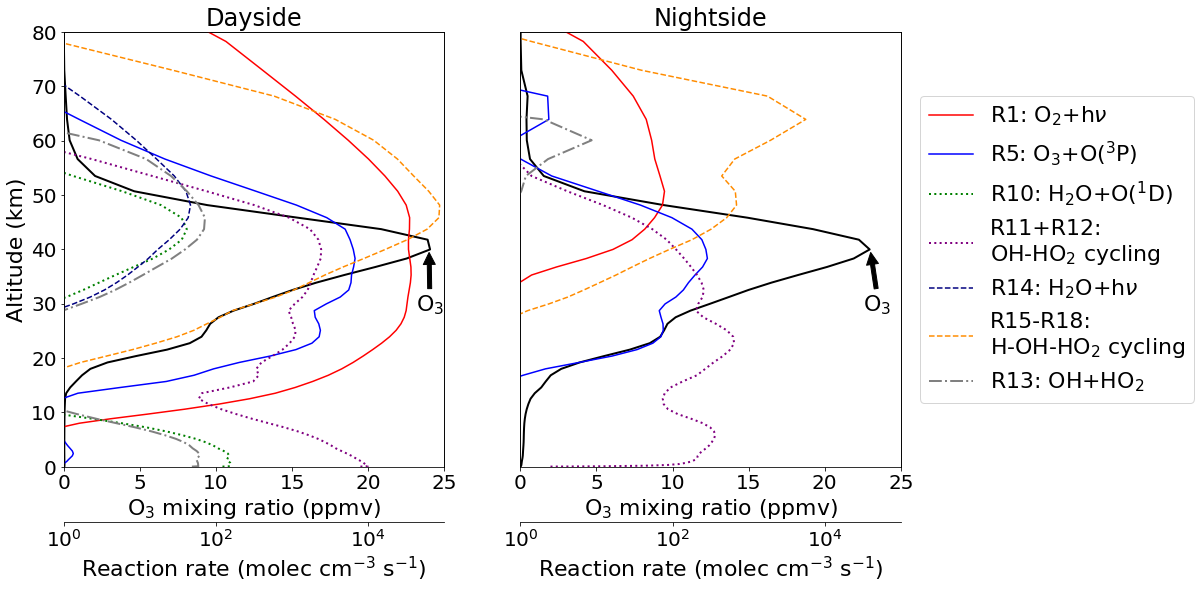

In [10]:
n_a=6.0221409e23


# Dayside reaction rates and ozone abundance
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
iplt.plot(o3mmr_mday[:]*10**(6), o3mmr_mday.coord("Hybrid height")/1000, color='black', lw=2, ls='-', label='O3 mmr')
ax1.set_title('Dayside', fontsize=24)
ax1.set_ylabel(r'Altitude (km)', fontsize=22)
ax1.set_xlabel('O$_3$ mixing ratio (ppmv)', fontsize=22)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 25)
ax1.set_ylim(0.0, 80)
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', which='major', labelsize=20)
ax1.annotate('O$_3$', xy=(24, 39.8),  xycoords='data',
            xytext=(0.925, 0.4), size=22, textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )

# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis object

ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom

iplt.plot(rf1_mday[:]*n_a*1e-6, rf1_mday.coord("Hybrid height")/1000, color='red', ls='-', label='R1')
iplt.plot(rf5_mday[:]*n_a*1e-6, rf5_mday.coord("Hybrid height")/1000, color='blue', ls='-', label='R5')
iplt.plot(rf10_mday[:]*n_a*1e-6, rf10_mday.coord("Hybrid height")/1000 ,  color='green', ls='dotted', lw=2, label='R10')
iplt.plot(hox1_mday[:]*n_a*1e-6, hox1_mday.coord("Hybrid height")/1000 ,  color='purple', ls='dotted', lw=2, label='OH-HO$_2$ cycling')
iplt.plot(rf14_mday[:]*n_a*1e-6, rf14_mday.coord("Hybrid height")/1000,  color='navy', ls='--', label='R14')
iplt.plot(hox2_mday[:]*n_a*1e-6, hox2_mday.coord("Hybrid height")/1000,  color='darkorange', ls='--', label='H-OH-HO$_2$ cycling')
iplt.plot(rf13_mday[:]*n_a*1e-6, rf13_mday.coord("Hybrid height")/1000 , color='grey', ls='dashdot', lw=2, label='R13')
ax2.set_xlim(1e0, 1e5)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 55))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='x', colors='black')
ax2.set_xlabel(u'Reaction rate (molec cm$^{-3}$ s$^{-1}$)', fontsize=22)

#nightside
ax1 = plt.subplot(1,2,2)
iplt.plot(o3mmr_mnight[:]*10**(6), o3mmr_mnight.coord("Hybrid height")/1000, color='black', lw=2, ls='-', label='O3 mmr')
ax1.set_title('Nightside', fontsize=24)
ax1.set_xlabel('O$_3$ mixing ratio (ppmv)', fontsize=22)
ax1.spines['bottom'].set_color('black')
ax1.xaxis.label.set_color('black')
ax1.set_xlim(0.0, 25)
ax1.set_ylim(0.0, 80)
ax1.set_yticks([])
ax1.tick_params(axis='x', which='major', labelsize=20)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', which='major', labelsize=20)
ax1.annotate('O$_3$', xy=(23, 39.8),  xycoords='data',
            xytext=(0.9, 0.4), size=22, textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
# # twin object for two different y-axis on the sample plot
ax2=ax1.twiny()
# make a plot with different y-axis using second axis object
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom

iplt.plot(rf1_mnight[:]*n_a*1e-6, rf1_mnight.coord("Hybrid height")/1000, color='red', ls='-', label=r'R1: O$_2$+h$\nu$')
iplt.plot(rf5_mnight[:]*n_a*1e-6, rf5_mnight.coord("Hybrid height")/1000 , color='blue', ls='-', label=r'R5: O$_3$+O($^3$P)')
iplt.plot(rf10_mnight[:]*n_a*1e-6, rf10_mnight.coord("Hybrid height")/1000 ,  color='green', ls='dotted', lw=2, label='R10: H$_2$O+O($^1$D)')
iplt.plot(hox1_mnight[:]*n_a*1e-6, hox1_mnight.coord("Hybrid height")/1000 ,  color='purple', ls='dotted', lw=2, label='R11+R12:\nOH-HO$_2$ cycling')
iplt.plot(rf14_mnight[:]*n_a*1e-6, rf14_mnight.coord("Hybrid height")/1000,  color='navy', ls='--', label=r'R14: H$_2$O+h$\nu$')
iplt.plot(hox2_mnight[:]*n_a*1e-6, hox2_mnight.coord("Hybrid height")/1000,  color='darkorange', ls='--', label='R15-R18:\nH-OH-HO$_2$ cycling')
iplt.plot(rf13_mnight[:]*n_a*1e-6, rf13_mnight.coord("Hybrid height")/1000 , color='grey', ls='dashdot', lw=2, label=r'R13: OH+HO$_2$')

ax2.set_xlim(1e0, 1e5)
ax2.set_xscale('log')
ax2.spines['bottom'].set_position(('outward', 55))
ax2.spines['bottom'].set_color('black')
ax2.xaxis.label.set_color('black')
ax2.tick_params(axis='x', which='major', labelsize=20)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', which='major', labelsize=20)
ax2.set_xlabel(u'Reaction rate (molec cm$^{-3}$ s$^{-1}$)', fontsize=22)
ax2.legend(loc='center right', fontsize=22, bbox_to_anchor=(1.8, 0.5))

plt.show()





# NO$_y$ reaction rates as shown in Figure 9 of Braam et al. (2022)

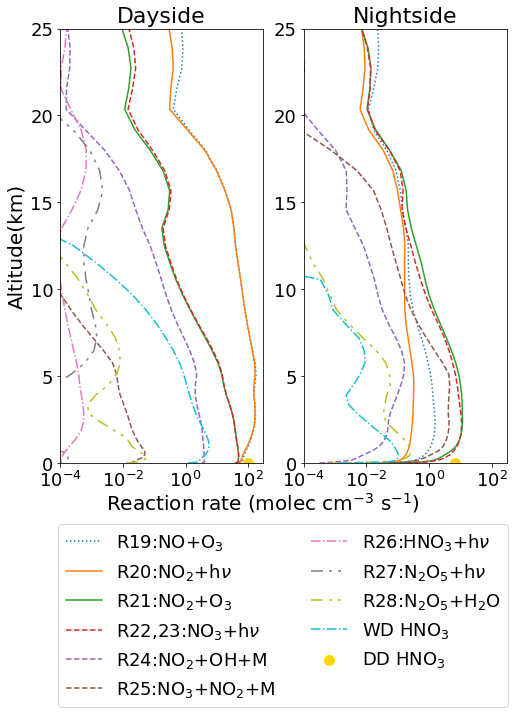

In [12]:
# Some meteorological data
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
iplt.plot(rf50522_day*n_a*1e-6, rf50522_day.coord('Hybrid height')/1000, ls=':', label='NO+O$_3$')

iplt.plot(rf50532_day*n_a*1e-6, rf50532_day.coord('Hybrid height')/1000, label='NO$_2$+hv')
iplt.plot(rf50523_day*n_a*1e-6, rf50523_day.coord('Hybrid height')/1000, label='NO$_2$+O$_3$')

iplt.plot(rfphot_day*n_a*1e-6, rfphot_day.coord('Hybrid height')/1000, ls='--', label='NO$_3$+hv')

iplt.plot(rf50542_day*n_a*1e-6, rf50542_day.coord('Hybrid height')/1000, ls='--', label='NO$_2$OH+M')
iplt.plot(rf50524_day*n_a*1e-6, rf50524_day.coord('Hybrid height')/1000, ls='--', label='NO$_3$+NO$_2$')

iplt.plot(rf50534_day*n_a*1e-6, rf50534_day.coord('Hybrid height')/1000, ls='dashdot', label='HNO$_3$+hv')

iplt.plot(rf50537_day*n_a*1e-6, rf50537_day.coord('Hybrid height')/1000, dashes=[8, 4, 2, 4, 2, 4], label='N$_2$O$_5$+hv')
iplt.plot(rf50016_day*n_a*1e-6, rf50016_day.coord('Hybrid height')/1000, dashes=[8, 4, 2, 4, 2, 4], label='N$_2$O$_5$+H$_2$O')

iplt.plot(hno3_wdep_day*n_a*1e-6, hno3_wdep_day.coord('Hybrid height')/1000, ls='dashdot', label='HNO$_3$ Wdep')
plt.scatter(hno3_dep_day.data*n_a*1e-6, hno3_dep_day.coord('Hybrid height').points/1000, label='HNO$_3$ Ddep'
            , s=100, color='gold')

plt.gca().set_title('Dayside', fontsize=22)
plt.gca().xaxis.set_label_coords(1.0, -0.063)
plt.xlabel('Reaction rate (molec cm$^{-3}$ s$^{-1}$)', fontsize=20)#, horizontalalignment='right')
plt.ylabel('Altitude(km)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e-4, 3e2)
plt.ylim(0,25)

plt.subplot(1, 2, 2)
iplt.plot(rf50522_night*n_a*1e-6, rf50522_night.coord('Hybrid height')/1000, ls=':', label=r'R19:NO+O$_3$')

iplt.plot(rf50532_night*n_a*1e-6, rf50532_night.coord('Hybrid height')/1000, label=r'R20:NO$_2$+h$\nu$')
iplt.plot(rf50523_night*n_a*1e-6, rf50523_night.coord('Hybrid height')/1000, label=r'R21:NO$_2$+O$_3$')

iplt.plot(rfphot_night*n_a*1e-6, rfphot_night.coord('Hybrid height')/1000, ls='--', label=r'R22,23:NO$_3$+h$\nu$')
iplt.plot(rf50542_night*n_a*1e-6, rf50542_night.coord('Hybrid height')/1000, ls='--', label=r'R24:NO$_2$+OH+M')
iplt.plot(rf50524_night*n_a*1e-6, rf50524_night.coord('Hybrid height')/1000, ls='--', label=r'R25:NO$_3$+NO$_2$+M')

iplt.plot(rf50534_night*n_a*1e-6, rf50534_night.coord('Hybrid height')/1000, ls='dashdot', label=r'R26:HNO$_3$+h$\nu$')

iplt.plot(rf50537_night*n_a*1e-6, rf50537_night.coord('Hybrid height')/1000, dashes=[8, 4, 2, 4, 2, 4], label=r'R27:N$_2$O$_5$+h$\nu$')
iplt.plot(rf50016_night*n_a*1e-6, rf50016_night.coord('Hybrid height')/1000, dashes=[8, 4, 2, 4, 2, 4], label=r'R28:N$_2$O$_5$+H$_2$O')

iplt.plot(hno3_wdep_night*n_a*1e-6, hno3_wdep_night.coord('Hybrid height')/1000, ls='dashdot', label=r'WD HNO$_3$')
plt.scatter(hno3_dep_night.data*n_a*1e-6, hno3_dep_night.coord('Hybrid height').points/1000, label=r'DD HNO$_3$'
            , s=100, color='gold')

plt.gca().set_title('Nightside', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.xlim(1e-4, 3e2)
plt.ylim(0,25)
plt.legend(loc='center right', fontsize=18, bbox_to_anchor=(1.05, -0.35), ncol=2)
plt.show()